<a href="https://colab.research.google.com/github/EZzero7/Red_Neuronal/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [ ]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(10,activation = 'softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

In [ ]:
x_train = train_data.reshape(60000,28*28)
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=120)

Epoch 1/5
500/500 [==============================] - 2s 2ms/step - loss: 0.4219 - accuracy: 0.8779
Epoch 2/5
500/500 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9672
Epoch 3/5
500/500 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9790
Epoch 4/5
500/500 [==============================] - 1s 2ms/step - loss: 0.0473 - accuracy: 0.9858
Epoch 5/5
500/500 [==============================] - 1s 2ms/step - loss: 0.0343 - accuracy: 0.9897


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9802


[0.06719249486923218, 0.9801999926567078]

In [ ]:
predictions = model.predict(x_test)

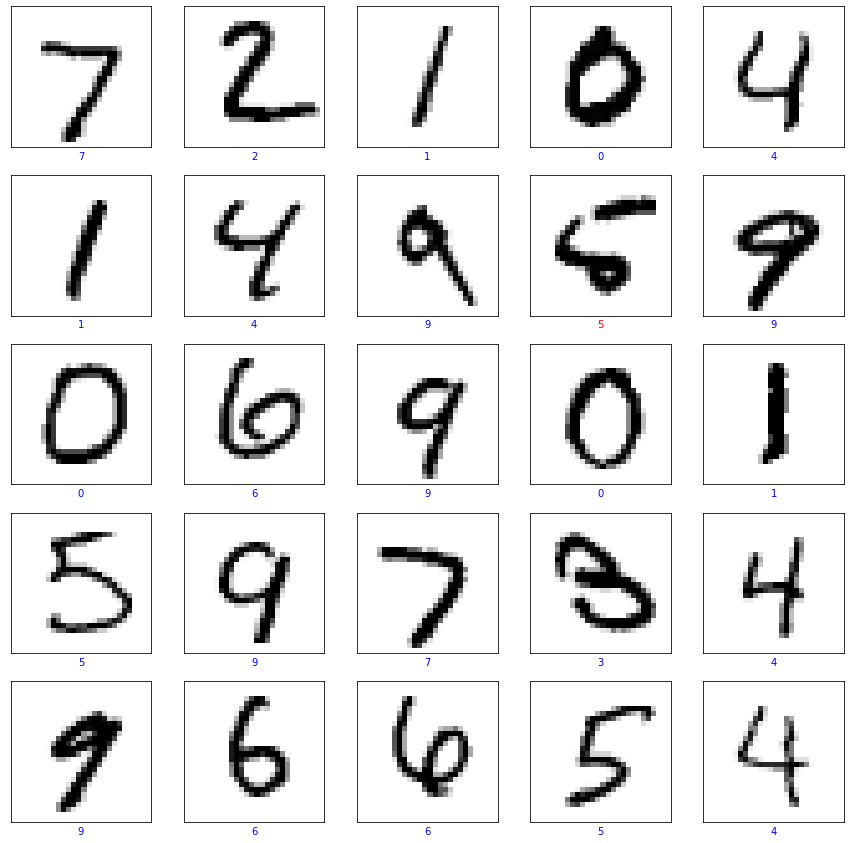

In [ ]:
plt.figure(figsize= (15,15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_data[i], cmap= plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel(test_labels[i]).set_color(color)